In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
test_data = pd.read_csv(r'E:\Info_Srping\FWI_Prediction\Data\processed\test_data.csv')
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.0,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.630000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.0,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.054170,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.3,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.330000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.2,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.610280,6.7
4,2014-11-08 12:00:00,0.5,-4.1,71.0,27.7,267,1001.24,22.9,23.3,0,...,0.1,0.0,0.0,0.0,0.0,0.0,Canada,46.780000,-65.020000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315713,2014-07-19 12:00:00,24.0,13.0,50.0,13.0,130,1025.20,16.1,0.0,2,...,14.0,79.4,19.5,5.7,8.7,1.3,United States,43.645645,-70.308620,23.1
315714,2011-09-28 12:00:00,14.8,4.5,51.0,14.0,240,1015.74,36.2,0.0,4,...,5.0,177.0,10.0,5.1,5.0,0.5,France,43.914722,2.116389,172.0
315715,2010-08-15 12:00:00,21.0,20.0,94.0,13.0,140,1010.00,14.5,6.0,0,...,19.6,296.5,33.7,0.1,0.1,0.0,Canada,45.950000,-77.316666,130.1
315716,2019-06-30 12:00:00,26.9,16.3,52.0,9.9,32,1016.20,17.7,0.0,1,...,17.7,99.3,24.5,4.9,8.7,1.2,Canada,41.948612,-82.518890,176.8


In [3]:
test_data = test_data.iloc[:20000]       
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,wind_direction,atmospheric_pressure,visibility,precipitation,rain_days,...,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,daily_severity_rating,country,latitude,longitude,elevation
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,230,1016.53,24.0,0.0,1,...,9.6,20.8,9.5,4.6,4.8,0.4,Canada,44.710000,-63.63000,3.5
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,280,1015.60,24.1,0.0,1,...,39.0,310.7,59.4,3.0,9.6,1.5,Canada,52.183056,-122.05417,939.7
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,350,1021.90,24.1,4.3,0,...,14.3,481.2,26.6,0.4,0.5,0.0,Canada,64.110000,-117.33000,221.0
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,300,1004.80,19.9,7.2,0,...,0.1,0.4,0.1,0.0,0.0,0.0,Canada,47.613056,-57.61028,6.7
4,2014-11-08 12:00:00,0.5,-4.1,71.0,27.7,267,1001.24,22.9,23.3,0,...,0.1,0.0,0.0,0.0,0.0,0.0,Canada,46.780000,-65.02000,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011-10-27 12:00:00,8.3,-9.4,29.0,33.3,270,1019.80,16.1,0.0,2,...,18.2,497.8,33.4,17.8,27.3,9.5,United States,47.482300,-111.37028,1121.7
19996,2016-10-03 12:00:00,29.4,16.1,44.6,16.7,70,1013.60,16.1,0.0,6,...,32.7,113.3,38.0,10.5,20.0,5.5,United States,29.950832,-94.02069,4.5
19997,2014-07-25 12:00:00,21.8,6.5,38.4,5.5,190,1018.30,14.6,0.1,0,...,61.1,460.4,91.8,1.0,4.9,0.5,Canada,49.940000,-119.40000,456.0
19998,2018-09-22 12:00:00,11.0,2.1,54.0,9.5,300,1024.80,29.0,15.0,0,...,5.6,236.0,10.6,0.1,0.0,0.0,Canada,46.274700,-75.99190,200.0


In [71]:
test_data.columns

Index(['report_date', 'temperature', 'dew_point_temperature',
       'relative_humidity', 'wind_speed', 'wind_direction',
       'atmospheric_pressure', 'visibility', 'precipitation', 'rain_days',
       'snow_on_ground', 'fine_fuel_moisture_code', 'duff_moisture_code',
       'drought_code', 'build_up_index', 'initial_spread_index',
       'fire_weather_index', 'daily_severity_rating', 'country', 'latitude',
       'longitude', 'elevation'],
      dtype='object')

In [4]:
test_data = test_data.drop(['wind_direction','snow_on_ground','daily_severity_rating','latitude','longitude', 'elevation','visibility'], axis = 1)
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,drought_code,build_up_index,initial_spread_index,fire_weather_index,country
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,1016.53,0.0,1,87.9,9.6,20.8,9.5,4.6,4.8,Canada
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,1015.60,0.0,1,86.1,39.0,310.7,59.4,3.0,9.6,Canada
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,1021.90,4.3,0,53.6,14.3,481.2,26.6,0.4,0.5,Canada
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,1004.80,7.2,0,33.2,0.1,0.4,0.1,0.0,0.0,Canada
4,2014-11-08 12:00:00,0.5,-4.1,71.0,27.7,1001.24,23.3,0,25.4,0.1,0.0,0.0,0.0,0.0,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011-10-27 12:00:00,8.3,-9.4,29.0,33.3,1019.80,0.0,2,88.2,18.2,497.8,33.4,17.8,27.3,United States
19996,2016-10-03 12:00:00,29.4,16.1,44.6,16.7,1013.60,0.0,6,90.3,32.7,113.3,38.0,10.5,20.0,United States
19997,2014-07-25 12:00:00,21.8,6.5,38.4,5.5,1018.30,0.1,0,75.5,61.1,460.4,91.8,1.0,4.9,Canada
19998,2018-09-22 12:00:00,11.0,2.1,54.0,9.5,1024.80,15.0,0,41.8,5.6,236.0,10.6,0.1,0.0,Canada


In [5]:
# Load saved PowerTransformer dictionary
# Load saved transformers
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\power_transformers.pkl', 'rb') as f:
    power_transformers = pickle.load(f)

with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\standard_scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

# Load saved OneHotEncoding
with open(r'E:\Info_Srping\FWI_Prediction\models\Final_pkl_files\one_hot_encoder.pkl', 'rb') as f:
    ohe = pickle.load(f)

# Load saved LR_Model
with open(r'linear_regression_V2.pkl', 'rb') as f:
    LR_model = pickle.load(f)

In [6]:
col = ['fine_fuel_moisture_code','duff_moisture_code', 'drought_code','build_up_index', 'initial_spread_index','fire_weather_index','wind_speed']
for col, pt in power_transformers.items():
    # Transform test column using fitted transformer
    transformed = pt.transform(test_data[col].values.reshape(-1, 1))
    test_data[col + '_transformed'] = transformed.flatten()


In [7]:
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,2015-06-26 12:00:00,20.6,6.4,39.8,7.4,1016.53,0.0,1,87.9,9.6,...,4.6,4.8,Canada,57729.416929,2.582265,6.681292,2.800837,1.534612,1.699674,3.475910
1,2011-08-24 12:00:00,19.0,6.0,42.0,3.7,1015.60,0.0,1,86.1,39.0,...,3.0,9.6,Canada,54670.829278,4.248365,27.302791,5.598634,1.262640,2.256704,2.195975
2,2010-08-13 12:00:00,15.2,8.0,62.0,11.0,1021.90,4.3,0,53.6,14.3,...,0.4,0.5,Canada,15775.466729,3.026258,33.719207,4.258439,0.328837,0.402316,4.435490
3,2015-12-13 12:00:00,3.6,-1.4,70.1,33.3,1004.80,7.2,0,33.2,0.1,...,0.0,0.0,Canada,4542.375219,0.095651,0.363329,0.095970,-0.000000,-0.000000,8.283965
4,2014-11-08 12:00:00,0.5,-4.1,71.0,27.7,1001.24,23.3,0,25.4,0.1,...,0.0,0.0,Canada,2280.687031,0.095651,0.000000,0.000000,-0.000000,-0.000000,7.502995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011-10-27 12:00:00,8.3,-9.4,29.0,33.3,1019.80,0.0,2,88.2,18.2,...,17.8,27.3,United States,58249.315978,3.307121,34.271698,4.620105,2.416040,3.136618,8.283965
19996,2016-10-03 12:00:00,29.4,16.1,44.6,16.7,1013.60,0.0,6,90.3,32.7,...,10.5,20.0,United States,61970.531524,4.023936,16.563541,4.831416,2.075846,2.872806,5.662449
19997,2014-07-25 12:00:00,21.8,6.5,38.4,5.5,1018.30,0.1,0,75.5,61.1,...,1.0,4.9,Canada,38705.798311,4.837734,33.011971,6.400618,0.661263,1.715644,2.871258
19998,2018-09-22 12:00:00,11.0,2.1,54.0,9.5,1024.80,15.0,0,41.8,5.6,...,0.1,0.0,Canada,8251.830926,2.026824,23.873052,2.941854,0.094691,-0.000000,4.058961


In [8]:
numeric_cols = test_data.select_dtypes(include=['float64', 'int']).columns
test_data[numeric_cols] = scaler.transform(test_data[numeric_cols])

In [9]:
test_data

,report_date,temperature,dew_point_temperature,relative_humidity,wind_speed,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code,duff_moisture_code,...,initial_spread_index,fire_weather_index,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,initial_spread_index_transformed,fire_weather_index_transformed,wind_speed_transformed
0,2015-06-26 12:00:00,0.496550,-0.116970,-0.866823,-0.807204,0.267586,-0.345472,-0.325741,0.690642,-0.425238,...,-0.077859,-0.398976,Canada,0.771256,-0.342798,-1.357583,-0.666431,0.408222,0.019158,-0.784214
1,2011-08-24 12:00:00,0.293559,-0.171408,-0.763204,-1.197847,0.142047,-0.345472,-0.325741,0.603733,0.255980,...,-0.233098,-0.096494,Canada,0.623200,0.803852,0.514200,0.823955,0.047828,0.490669,-1.442433
2,2010-08-13 12:00:00,-0.188542,0.100785,0.178793,-0.427119,0.992473,0.245171,-0.542337,-0.965453,-0.316336,...,-0.485360,-0.669949,Canada,-1.259606,-0.037231,1.096609,0.110033,-1.189566,-1.079019,-0.290740
3,2015-12-13 12:00:00,-1.660220,-1.178524,0.560302,1.927297,-1.315827,0.643512,-0.542337,-1.950419,-0.645359,...,-0.524170,-0.701457,Canada,-1.803365,-2.054146,-1.931055,-2.107313,-1.625313,-1.419568,1.688377
4,2014-11-08 12:00:00,-2.053514,-1.545985,0.602692,1.336054,-1.796385,2.854990,-0.542337,-2.327024,-0.645359,...,-0.524170,-0.701457,Canada,-1.912847,-2.054146,-1.964034,-2.158437,-1.625313,-1.419568,1.286755
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2011-10-27 12:00:00,-1.063937,-2.267298,-1.375501,1.927297,0.708998,-0.345472,-0.109146,0.705127,-0.225970,...,1.202859,1.018908,United States,0.796423,0.156065,1.146758,0.302692,1.576214,1.235492,1.688377
19996,2016-10-03 12:00:00,1.612995,1.203169,-0.640744,0.174683,-0.127930,-0.345472,0.757237,0.806521,0.110005,...,0.494583,0.558884,United States,0.976556,0.649394,-0.460585,0.415258,1.125418,1.012182,0.340236
19997,2014-07-25 12:00:00,0.648792,-0.103360,-0.932763,-1.007804,0.506515,-0.331736,-0.542337,0.091937,0.768052,...,-0.427146,-0.392674,Canada,-0.149619,1.209470,1.032414,1.251171,-0.749064,0.032676,-1.095162
19998,2018-09-22 12:00:00,-0.721391,-0.702185,-0.198005,-0.585487,1.383939,1.714911,-0.542337,-1.535188,-0.517920,...,-0.514468,-0.701457,Canada,-1.623802,-0.725066,0.202888,-0.591312,-1.499837,-1.419568,-0.484374


In [10]:
test_data = test_data[['temperature', 'dew_point_temperature', 'relative_humidity',
        'atmospheric_pressure', 'precipitation', 'rain_days',
       'country', 'fine_fuel_moisture_code_transformed',
       'duff_moisture_code_transformed', 'drought_code_transformed',
       'build_up_index_transformed', 'initial_spread_index_transformed',
       'fire_weather_index_transformed', 'wind_speed_transformed']]

In [11]:
test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
test_data['RH_TEMP'] = test_data['temperature'] * test_data['relative_humidity']
test_data['RD_FFMC'] =  test_data['fine_fuel_moisture_code_transformed'] * test_data['rain_days']
test_data['DC_RD'] =  test_data['drought_code_transformed'] * test_data['rain_days']
test_data['WS_TENP'] =  test_data['wind_speed_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['IST_WS'] =  test_data['wind_speed_transformed'] * test_data['initial_spread_index_transformed']
test_data['ISI_FFMC'] =  test_data['initial_spread_index_transformed'] * test_data['fine_fuel_moisture_code_transformed']
test_data['ISI_RH'] =  test_data['initial_spread_index_transformed'] * test_data['relative_humidity']
test_data['DMC_TEMP'] =  test_data['duff_moisture_code_transformed'] * test_data['temperature']
test_data['DMC_RD'] =  test_data['duff_moisture_code_transformed'] * test_data['rain_days']
test_data['RD_TEMP'] =  test_data['rain_days'] * test_data['temperature']
test_data['DMC_DC'] =  test_data['drought_code_transformed'] * test_data['duff_moisture_code_transformed']
test_data['BUI_DC'] =  test_data['drought_code_transformed'] * test_data['build_up_index_transformed']
test_data['BUI_DMC'] =  test_data['duff_moisture_code_transformed'] * test_data['build_up_index_transformed']

C:\Users\DELL\AppData\Local\Temp\ipykernel_16220\3843077778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC__TEMP'] = test_data['temperature'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_16220\3843077778.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['FFMC_RH'] = test_data['relative_humidity'] * test_data['fine_fuel_moisture_code_transformed']
C:\Users\DELL\AppData\Local\Temp\ipykernel_16220\3843077778.py:3: SettingWithCopy

In [12]:
test_data

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,country,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,...,WS_TENP,IST_WS,ISI_FFMC,ISI_RH,DMC_TEMP,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC
0,0.496550,-0.116970,-0.866823,0.267586,-0.345472,-0.325741,Canada,0.771256,-0.342798,-1.357583,...,-0.604830,-0.320133,0.314844,-0.353856,-0.170216,0.111664,-0.161747,0.465377,0.904736,0.228452
1,0.293559,-0.171408,-0.763204,0.142047,-0.345472,-0.325741,Canada,0.623200,0.803852,0.514200,...,-0.898924,-0.068988,0.029806,-0.036502,0.235978,-0.261848,-0.095624,0.413341,0.423678,0.662338
2,-0.188542,0.100785,0.178793,0.992473,0.245171,-0.542337,Canada,-1.259606,-0.037231,1.096609,...,0.366218,0.345854,1.498385,-0.212686,0.007020,0.020192,0.102253,-0.040828,0.120663,-0.004097
3,-1.660220,-1.178524,0.560302,-1.315827,0.643512,-0.542337,Canada,-1.803365,-2.054146,-1.931055,...,-3.044761,-2.744141,2.931033,-0.910666,3.410335,1.114039,0.900399,3.966669,4.069338,4.328730
4,-2.053514,-1.545985,0.602692,-1.796385,2.854990,-0.542337,Canada,-1.912847,-2.054146,-1.964034,...,-2.461366,-2.091380,3.108975,-0.979563,4.218218,1.114039,1.113696,4.034412,4.239243,4.433745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.063937,-2.267298,-1.375501,0.708998,-0.345472,-0.109146,United States,0.796423,0.156065,1.146758,...,1.344663,2.661244,1.255333,-2.168085,-0.166043,-0.017034,0.116124,0.178968,0.347115,0.047240
19996,1.612995,1.203169,-0.640744,-0.127930,-0.345472,0.757237,United States,0.976556,0.649394,-0.460585,...,0.332260,0.382908,1.099034,-0.721105,1.047470,0.491745,1.221419,-0.299101,-0.191262,0.269666
19997,0.648792,-0.103360,-0.932763,0.506515,-0.331736,-0.542337,Canada,-0.149619,1.209470,1.032414,...,0.163857,0.820346,0.112074,0.698699,0.784695,-0.655940,-0.351864,1.248674,1.291727,1.513254
19998,-0.721391,-0.702185,-0.198005,1.383939,1.714911,-0.542337,Canada,-1.623802,-0.725066,0.202888,...,0.786527,0.726482,2.435438,0.296976,0.523056,0.393230,0.391237,-0.147107,-0.119970,0.428740


In [13]:
test_data.columns

Index(['temperature', 'dew_point_temperature', 'relative_humidity',
       'atmospheric_pressure', 'precipitation', 'rain_days', 'country',
       'fine_fuel_moisture_code_transformed', 'duff_moisture_code_transformed',
       'drought_code_transformed', 'build_up_index_transformed',
       'initial_spread_index_transformed', 'fire_weather_index_transformed',
       'wind_speed_transformed', 'FFMC__TEMP', 'FFMC_RH', 'RH_TEMP', 'RD_FFMC',
       'DC_RD', 'WS_TENP', 'IST_WS', 'ISI_FFMC', 'ISI_RH', 'DMC_TEMP',
       'DMC_RD', 'RD_TEMP', 'DMC_DC', 'BUI_DC', 'BUI_DMC'],
      dtype='object')

In [14]:
encoded_array = ohe.transform(test_data[['country']])  
encoded_df = pd.DataFrame(encoded_array, columns=ohe.get_feature_names_out(['country']))
new_data_encoded = pd.concat([test_data.reset_index(drop=True), encoded_df.reset_index(drop=True)], axis=1)


In [15]:
new_data_encoded = new_data_encoded.drop(['country'], axis =1)
new_data_encoded

,temperature,dew_point_temperature,relative_humidity,atmospheric_pressure,precipitation,rain_days,fine_fuel_moisture_code_transformed,duff_moisture_code_transformed,drought_code_transformed,build_up_index_transformed,...,DMC_RD,RD_TEMP,DMC_DC,BUI_DC,BUI_DMC,country_Canada,country_France,country_Spain,country_United Kingdom,country_United States
0,0.496550,-0.116970,-0.866823,0.267586,-0.345472,-0.325741,0.771256,-0.342798,-1.357583,-0.666431,...,0.111664,-0.161747,0.465377,0.904736,0.228452,1,0,0,0,0
1,0.293559,-0.171408,-0.763204,0.142047,-0.345472,-0.325741,0.623200,0.803852,0.514200,0.823955,...,-0.261848,-0.095624,0.413341,0.423678,0.662338,1,0,0,0,0
2,-0.188542,0.100785,0.178793,0.992473,0.245171,-0.542337,-1.259606,-0.037231,1.096609,0.110033,...,0.020192,0.102253,-0.040828,0.120663,-0.004097,1,0,0,0,0
3,-1.660220,-1.178524,0.560302,-1.315827,0.643512,-0.542337,-1.803365,-2.054146,-1.931055,-2.107313,...,1.114039,0.900399,3.966669,4.069338,4.328730,1,0,0,0,0
4,-2.053514,-1.545985,0.602692,-1.796385,2.854990,-0.542337,-1.912847,-2.054146,-1.964034,-2.158437,...,1.114039,1.113696,4.034412,4.239243,4.433745,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,-1.063937,-2.267298,-1.375501,0.708998,-0.345472,-0.109146,0.796423,0.156065,1.146758,0.302692,...,-0.017034,0.116124,0.178968,0.347115,0.047240,0,0,0,0,1
19996,1.612995,1.203169,-0.640744,-0.127930,-0.345472,0.757237,0.976556,0.649394,-0.460585,0.415258,...,0.491745,1.221419,-0.299101,-0.191262,0.269666,0,0,0,0,1
19997,0.648792,-0.103360,-0.932763,0.506515,-0.331736,-0.542337,-0.149619,1.209470,1.032414,1.251171,...,-0.655940,-0.351864,1.248674,1.291727,1.513254,1,0,0,0,0
19998,-0.721391,-0.702185,-0.198005,1.383939,1.714911,-0.542337,-1.623802,-0.725066,0.202888,-0.591312,...,0.393230,0.391237,-0.147107,-0.119970,0.428740,1,0,0,0,0


In [16]:
# Prepare features and target from your new test data
X = new_data_encoded.drop('fire_weather_index_transformed', axis = 1)
y = new_data_encoded['fire_weather_index_transformed']

In [17]:
# Predict on the features
y_test_pred = LR_model.predict(X)

# Evaluate if target is available
if y is not None:
    from sklearn.metrics import r2_score, mean_squared_error
    print('Test R²:', r2_score(y, y_test_pred))
    print('Test MSE:', mean_squared_error(y, y_test_pred))


Test R²: 0.9786446447071482
Test MSE: 0.021337271666123283


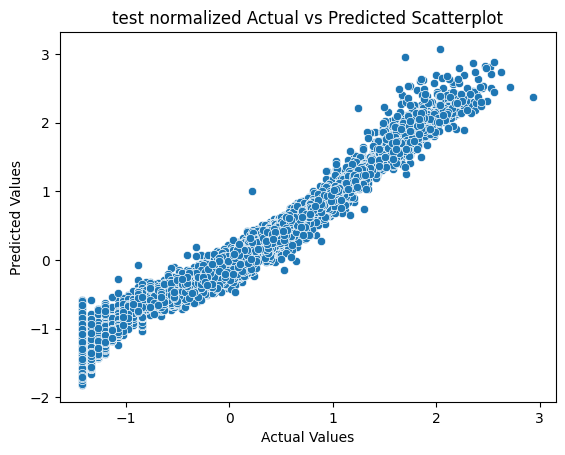

In [18]:
sns.scatterplot(x=y, y=y_test_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('test normalized Actual vs Predicted Scatterplot')
plt.savefig('test_normalized+Act_vs_pred.png')
plt.show()


In [19]:
# number of features scaler was trained on
n_features = len(scaler.mean_)  

# index of target column inside scaler
col_index = list(scaler.feature_names_in_).index('fire_weather_index_transformed')

def inverse_single_column(scaler, values, col_index):
    """
    Inverse transform only one column of a StandardScaler.
    values: (n_samples,) array in scaled space for target column
    col_index: index of target column inside scaler.feature_names_in_
    """
    # create dummy matrix with correct number of features
    dummy = np.zeros((len(values), n_features))
    dummy[:, col_index] = values  # put values only in target column
    
    # inverse transform all features
    inv = scaler.inverse_transform(dummy)
    
    # extract only target column (now back in power-transform space)
    return inv[:, col_index]

In [20]:
# Step 1: inverse StandardScaler
y_train_pred_power = inverse_single_column(scaler, y_test_pred, col_index)
y_train_power = inverse_single_column(scaler, y, col_index)

# Step 2: inverse PowerTransformer
pt = power_transformers['fire_weather_index']
y_train_pred_orig = pt.inverse_transform(y_train_pred_power.reshape(-1, 1)).ravel()
y_train_orig = pt.inverse_transform(y_train_power.reshape(-1, 1)).ravel()

# Step 3: evaluate metrics
from sklearn.metrics import r2_score, mean_squared_error

train_r2_orig = r2_score(y_train_orig, y_train_pred_orig)
train_mse_orig = mean_squared_error(y_train_orig, y_train_pred_orig)

print('Original scale R²:', train_r2_orig)
print('Original scale MSE:', train_mse_orig)

Original scale R²: 0.8338508629810581
Original scale MSE: 42.59209420118786


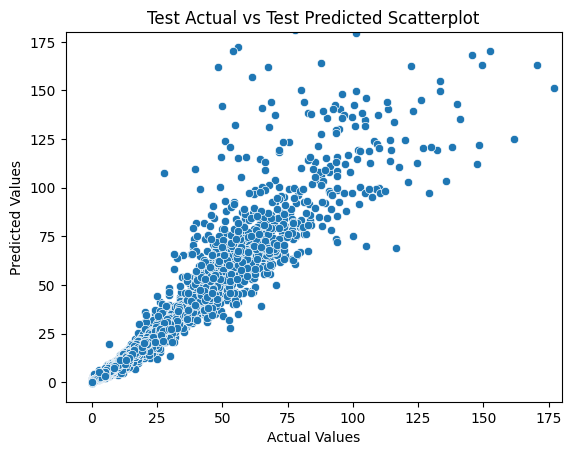

In [21]:
sns.scatterplot(x=y_train_orig, y=y_train_pred_orig)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Test Actual vs Test Predicted Scatterplot')
plt.ylim(-10, 180)
plt.xlim(-10, 180)
plt.savefig("test_data.png")
plt.show()


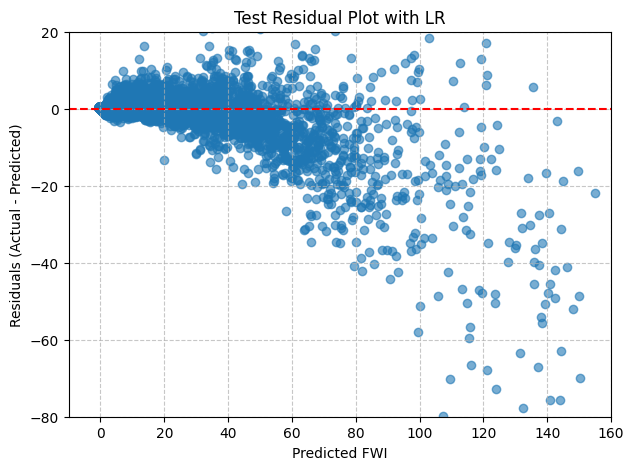

In [22]:
from matplotlib.ticker import MultipleLocator
# Compute residuals
train_residuals = y_train_orig - y_train_pred_orig

# Train residual plot
plt.figure(figsize=(7,5))
plt.scatter(y_train_pred_orig, train_residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FWI")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Test Residual Plot with LR")
plt.ylim(-80, 20)
plt.xlim(-10, 160)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_locator(MultipleLocator(20))
plt.savefig("LR_Test_Residual_v1_Plot.png")
plt.show()
